# Part 2

## Preliminary

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
np.random.seed(5432)

In [2]:
def activation_function(s):
    return 50 * (1 / (1 + np.exp(-s)))

## Question 1: Study the dynamics

In [35]:
omega_1 = 0.4
omega_2 = omega_1
I = -10


def f(t, y):
    return [
        -y[0] + activation_function(omega_2 * y[1] + I),
        -y[1] + activation_function(omega_1 * y[0] + I),
    ]

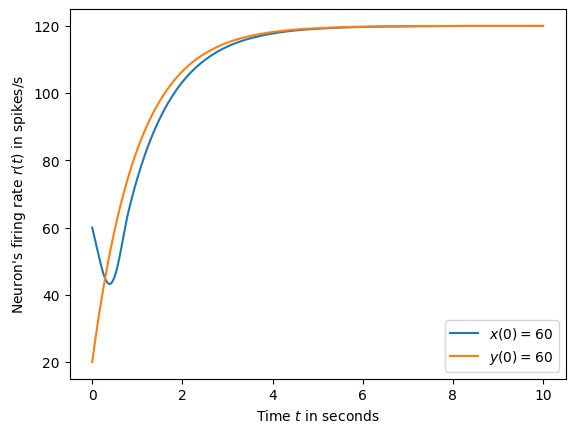

In [37]:
t0 = 0
tf = 10
for r0 in [60]:
    sol = solve_ivp(f, [t0, tf], [r0, 20], vectorized=True, dense_output=True)
    t = np.linspace(t0, tf, num=1000)
    plt.plot(t, sol.sol(t)[0], label="$x(0)={}$".format(r0))
    plt.plot(t, sol.sol(t)[1], label="$y(0)={}$".format(r0))
plt.xlabel("Time $t$ in seconds")
plt.ylabel("Neuron's firing rate $r(t)$ in spikes/s")
plt.legend()
plt.show()

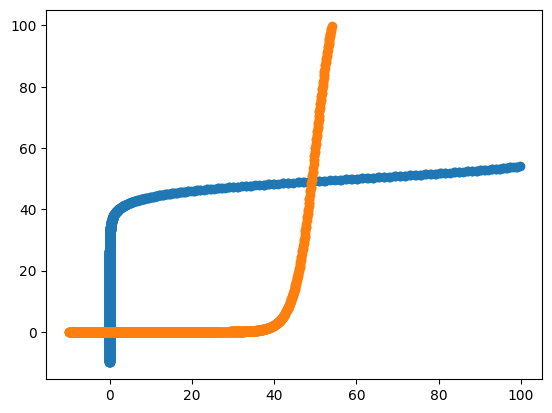

In [48]:
epsilon = 0.1
N = 1000
zeros1_x, zeros2_x = [], []
zeros1_y, zeros2_y = [], []
for x in np.linspace(-10, 100, num=N):
    for y in np.linspace(-10, 100, num=N):
        f1 = -x + activation_function(omega_2 * y + I)
        f2 = -y + activation_function(omega_2 * x + I)
        if abs(f1) < epsilon:
            zeros1_x.append(x)
            zeros1_y.append(y)
        if abs(f2) < epsilon:
            zeros2_x.append(x)
            zeros2_y.append(y)
plt.scatter(zeros1_x, zeros1_y)
plt.scatter(zeros2_x, zeros2_y)
plt.show()